In [1]:
#!pip install googlemaps

In [2]:
#!pip install folium

In [1]:
import pandas as pd
import numpy as np
import googlemaps
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [4]:
# Simulate generating random addresses in Germany for the purpose of example
# Note: These addresses are not real and are for demonstration only

np.random.seed(42)  # For reproducibility

# Example data for simulation
cities = ["Berlin", "Munich", "Hamburg", "Cologne", "Frankfurt", "Stuttgart", "Düsseldorf", "Dortmund", "Essen", "Leipzig"]
streets = ["Hauptstraße", "Schulstraße", "Gartenstraße", "Bahnhofstraße", "Dorfstraße", "Hauptweg", "Waldweg", "Nordstraße", "Südstraße", "Weststraße"]
postal_codes = [str(10000 + np.random.randint(0, 8999)) for _ in range(100)]

# Generating random addresses
addresses = []
for i in range(1, 101):
    city = np.random.choice(cities)
    street = np.random.choice(streets)
    postal_code = np.random.choice(postal_codes)
    address = f"{street} {np.random.randint(1, 200)}, {postal_code} {city}"
    addresses.append({"Factory": f"Factory {i}", "Address": address})

# Creating a DataFrame
df_addresses = pd.DataFrame(addresses)

In [5]:
# Define the data for the addresses
data = [
    {"Warehouse": "Warehouse 1", "Address": "Hauptstraße 200, 22089 Hamburg"},
    {"Warehouse": "Warehouse 2", "Address": "Gartenstraße 50, 20457 Hamburg"},
    {"Warehouse": "Warehouse 3", "Address": "Coolsingel 42, 3011 AD Rotterdam"}
]

# Create a DataFrame
df_warehouse = pd.DataFrame(data)

In [6]:
# Initialize Google Maps client
#gmaps = googlemaps.Client(key='API_KEY')  # Replace with your actual API key

# Function to fetch coordinates
def get_coordinates(address):
    try:
        location = gmaps.geocode(address)[0]['geometry']['location']
        return pd.Series([location['lat'], location['lng']])
    except:
        return pd.Series([None, None])

# Apply function to DataFrame
#df_addresses[['Latitude', 'Longitude']] = df_addresses['Address'].apply(get_coordinates)

# Export to CSV
#df_addresses.to_csv('factory_coordinates_google.csv', index=False)

In [7]:
# Initialize Google Maps client
#gmaps = googlemaps.Client(key='API_KEY')

# Function to calculate distance
def calculate_distances(warehouses, factories):
    results = []
    for _, w_row in warehouses.iterrows():
        for _, f_row in factories.iterrows():
            # Origin and destination coordinates
            origin = (w_row['Latitude'], w_row['Longitude'])
            destination = (f_row['Latitude'], f_row['Longitude'])
            
            # API call to Distance Matrix service
            distance_result = gmaps.distance_matrix(origins=[origin], destinations=[destination], mode='driving')
            
            distance_text = distance_result['rows'][0]['elements'][0]['distance']['text']
            distance_value = distance_result['rows'][0]['elements'][0]['distance']['value']  # Distance in meters
            
            results.append({
                'Warehouse': w_row['Warehouse'],
                'Factory': f_row['Factory'],
                'Distance': distance_text,
                'Distance_meters': distance_value
            })
    return pd.DataFrame(results)

# Calculating distances
#distance_df = calculate_distances(df_warehouse, df_addresses)

# Export to CSV
#distance_df.to_csv('distance_df.csv', index=False)

In [8]:
df_addresses_merge = pd.merge(df_addresses, distance_df, how='left', left_on='Factory', right_on='Factory')

NameError: name 'distance_df' is not defined

In [12]:
df_merge = pd.merge(df_addresses_merge, df_warehouse, how='left', left_on='Warehouse', right_on='Warehouse')

NameError: name 'df_addresses_merge' is not defined

In [13]:
df_merge['Volume'] = 5

NameError: name 'df_merge' is not defined

In [14]:
idx = df.groupby('Factory')['Distance_meters'].idxmin()
closest_warehouse_series = df.loc[idx, ['Factory', 'Warehouse']].set_index('Factory')['Warehouse']
df['Closest Warehouse'] = df['Factory'].map(closest_warehouse_series)

NameError: name 'df' is not defined

In [2]:
merged_df = pd.read_csv('merged_df.csv')

In [3]:
merged_df

,Factory,Address_x,Latitude_x,Longitude_x,Warehouse,Distance,Distance_meters,Address_y,Latitude_y,Longitude_y,Volume,Closest Warehouse,Closest Distance (meters)
0,Factory 1,"Hauptstraße 101, 12731 Hamburg",53.603182,9.817498,Warehouse 1,24.4 km,24402,"Hauptstraße 200, 22089 Hamburg",53.567381,10.047508,5,Warehouse 2,15156
1,Factory 1,"Hauptstraße 101, 12731 Hamburg",53.603182,9.817498,Warehouse 2,15.2 km,15156,"Gartenstraße 50, 20457 Hamburg",53.548828,9.987170,5,Warehouse 2,15156
2,Factory 1,"Hauptstraße 101, 12731 Hamburg",53.603182,9.817498,Warehouse 3,501 km,500631,"Coolsingel 42, 3011 AD Rotterdam",51.921893,4.479745,5,Warehouse 2,15156
3,Factory 2,"Hauptstraße 142, 15734 Hamburg",53.603367,9.817645,Warehouse 1,24.4 km,24364,"Hauptstraße 200, 22089 Hamburg",53.567381,10.047508,5,Warehouse 2,15117
4,Factory 2,"Hauptstraße 142, 15734 Hamburg",53.603367,9.817645,Warehouse 2,15.1 km,15117,"Gartenstraße 50, 20457 Hamburg",53.548828,9.987170,5,Warehouse 2,15117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Factory 99,"Gartenstraße 81, 13556 Munich",48.229603,11.477553,Warehouse 2,784 km,784327,"Gartenstraße 50, 20457 Hamburg",53.548828,9.987170,5,Warehouse 2,784327
296,Factory 99,"Gartenstraße 81, 13556 Munich",48.229603,11.477553,Warehouse 3,831 km,831368,"Coolsingel 42, 3011 AD Rotterdam",51.921893,4.479745,5,Warehouse 2,784327
297,Factory 100,"Nordstraße 154, 16278 Leipzig",51.339695,12.373075,Warehouse 1,396 km,396249,"Hauptstraße 200, 22089 Hamburg",53.567381,10.047508,5,Warehouse 2,395592
298,Factory 100,"Nordstraße 154, 16278 Leipzig",51.339695,12.373075,Warehouse 2,396 km,395592,"Gartenstraße 50, 20457 Hamburg",53.548828,9.987170,5,Warehouse 2,395592


In [4]:
df = merged_df.copy()

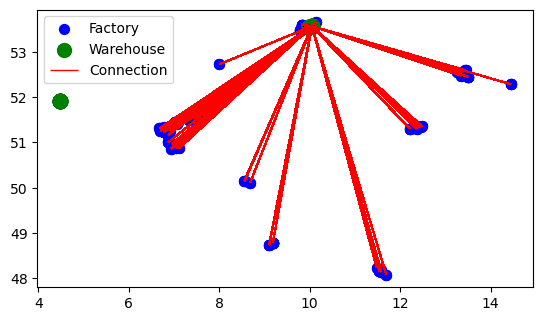

In [5]:
# Function to convert DataFrame to GeoDataFrame
def create_geodataframe(df, lat_col, lon_col):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[lon_col], df[lat_col]))
    return gdf
#####


# Function to create lines between factories and warehouses
def create_lines(factory_gdf, warehouse_gdf, warehouse):
    # Filter for a specific warehouse if needed
    if warehouse:
        warehouse_gdf = warehouse_gdf[warehouse_gdf['Warehouse'] == warehouse]
    
    lines = []
    for factory_idx, factory in factory_gdf.iterrows():
        for warehouse_idx, wh in warehouse_gdf.iterrows():
            line = LineString([factory.geometry, wh.geometry])
            lines.append(line)
    return lines

# Function to plot the GeoDataFrames and the lines
def plot_locations(factory_gdf, warehouse_gdf, lines):
    fig, ax = plt.subplots()
    factory_gdf.plot(ax=ax, color='blue', markersize=50, label='Factory')
    warehouse_gdf.plot(ax=ax, color='green', markersize=100, label='Warehouse')
    gpd.GeoSeries(lines).plot(ax=ax, color='red', linewidth=1, label='Connection')
    plt.legend()
    plt.show()

# Function to run the entire process for a given warehouse
def visualize_factory_warehouse_connections(df, warehouse=None):
    # Create GeoDataFrames
    factory_gdf = create_geodataframe(df, 'Latitude_x', 'Longitude_x')
    warehouse_gdf = create_geodataframe(df, 'Latitude_y', 'Longitude_y')
    
    # Create lines
    lines = create_lines(factory_gdf, warehouse_gdf, warehouse)
    
    # Plot
    plot_locations(factory_gdf, warehouse_gdf, lines)

visualize_factory_warehouse_connections(df, warehouse='Warehouse 1')
    
# The function call would look like this for Warehouse 1
# visualize_factory_warehouse_connections(df, warehouse='Warehouse 1')

# Note: The actual function call is commented out to prevent execution in this environment.

In [7]:
import folium
from folium.features import CustomIcon

# Function to create a Folium map
def create_folium_map(df, warehouse=None):
    # Create base map centered around Germany
    map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

    # Filter for a specific warehouse if provided
    if warehouse:
        df = df[df['Warehouse'] == warehouse]

    # Add lines and points to the map
    for _, row in df.iterrows():
        # Add line
        folium.PolyLine([(row['Latitude_x'], row['Longitude_x']), 
                         (row['Latitude_y'], row['Longitude_y'])], 
                        color='blue', weight=2.5, opacity=1).add_to(map)
        
        # Add factory marker
        folium.Marker([row['Latitude_x'], row['Longitude_x']], 
                      popup=row['Factory'],
                      icon=folium.Icon(color='green', icon='industrial', prefix='fa')).add_to(map)

        # Add warehouse marker
        folium.Marker([row['Latitude_y'], row['Longitude_y']], 
                      popup=row['Warehouse'],
                      icon=folium.Icon(color='red', icon='warehouse', prefix='fa')).add_to(map)

    # Show map
    return map

my_map = create_folium_map(df, warehouse='Warehouse 3')
# my_map.save('map.html')  # Save to an HTML file
my_map  # Display in a Jupyter notebook

In [8]:
# Creating a unique GeoDataFrame for warehouses
unique_warehouses_df = df.groupby(['Warehouse', 'Latitude_y', 'Longitude_y']).agg({'Volume': 'sum'}).reset_index()
gdf_warehouses = gpd.GeoDataFrame(
    unique_warehouses_df, 
    geometry=gpd.points_from_xy(unique_warehouses_df['Longitude_y'], unique_warehouses_df['Latitude_y'])
)
# Creating a GeoDataFrame for factories
gdf_factories = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude_x, df.Latitude_x))

# Initialize a Folium map
m = folium.Map(location=[gdf_factories['geometry'].y.mean(), gdf_factories['geometry'].x.mean()], zoom_start=6)

# Define a scaling factor for the volume to radius conversion
scaling_factor = 20 

# Add lines from each factory to its closest warehouse
for _, factory in gdf_factories.iterrows():
    closest_warehouse = gdf_warehouses[gdf_warehouses['Warehouse'] == factory['Closest Warehouse']].iloc[0]
    folium.PolyLine(locations=[
        (factory.geometry.y, factory.geometry.x),
        (closest_warehouse.geometry.y, closest_warehouse.geometry.x)
    ], color='blue').add_to(m)

# Add factories and warehouses to the map with bubble sizes based on volume
for _, location in pd.concat([gdf_factories, gdf_warehouses]).iterrows():
    # Apply scaling to the volume for visual representation
    scaled_volume = location['Volume'] * scaling_factor
    folium.Circle(
        location=[location.geometry.y, location.geometry.x],
        radius=scaled_volume,  # Apply the scaling here
        color='green' if 'Factory' in location else 'red',
        fill=True
    ).add_to(m)

# Display the map
m